In [14]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits as pf
import astropy.units as u
import os
import glob
# This makes nice big plots for matplotlib
import matplotlib as mpl
params = {'font.size': 14,
          'figure.figsize': (15.0, 8.0),
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'animation.embed_limit': 2048,
          }
mpl.rcParams.keys()
mpl.rcParams.update(params)
np.set_printoptions(suppress=True)

import sunpy.map

data_dir = os.path.abspath("/home/lazar/Fak(s)/AF/prakse/SDSA/data")

bitmaps = sorted(glob.glob(os.path.join(data_dir, "3481_11923_SHARP_CEA_bitmaps/*bitmap*")))
cont = sorted(glob.glob(os.path.join(data_dir, "3481_11923_SHARP_CEA_enhanced_norm/*enhanced_normalized*")))

In [15]:
print(bitmaps[600])
print(cont[600])
x = sunpy.map.Map(bitmaps[600])
y = sunpy.map.Map(cont[600])

/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_bitmaps/hmi.sharp_cea_720s.3481.20131213_111200_TAI.bitmap.fits
/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_111200_TAI.enhanced_normalized.fits


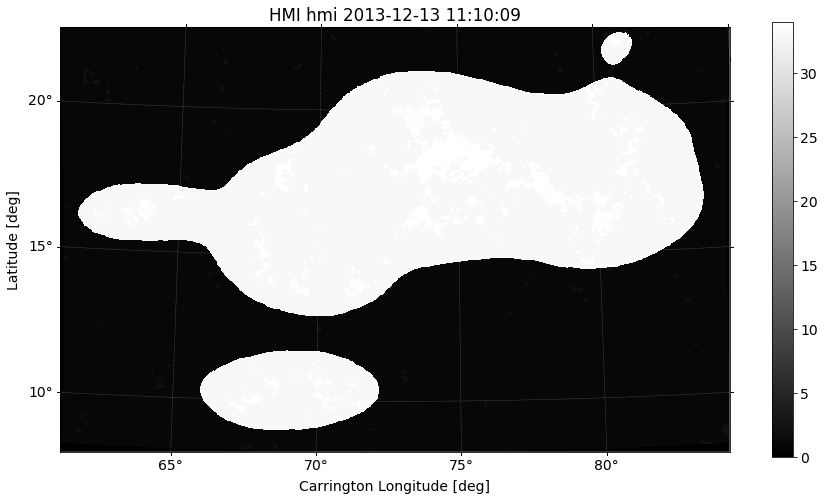

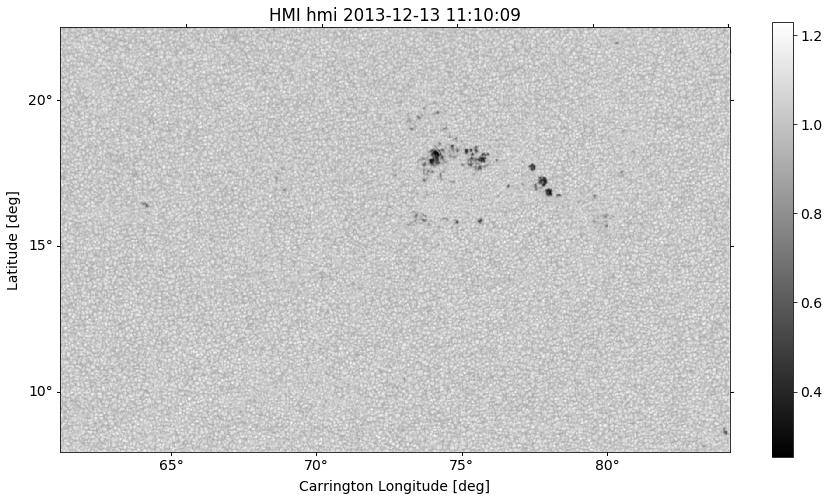

In [16]:
new_dimension = u.Quantity([x.meta["naxis1"]*2, x.meta["naxis2"]*2], u.pixel)
x.resample(new_dimension,method='neighbor').peek()
y.peek()


[[ 587 1116]
 [ 587 1117]
 [ 588 1115]
 ...
 [ 690  928]
 [ 690  929]
 [ 690  930]]


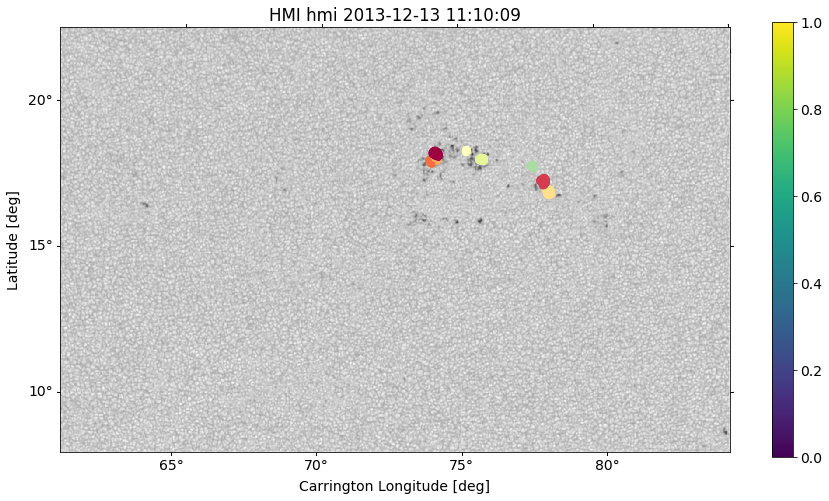

In [81]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib
X = np.argwhere((y.data <= 0.5) & (y.data > 0))
print(X)
model = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=8,
                        pooling_func='deprecated').fit(X)

mask = X * u.pixel
pixel_wrld = y.pixel_to_world(mask[:, 1], mask[:, 0])
#print(pixel_wrld)
fig = plt.figure()
ax = plt.subplot(projection=y)
y.plot()
#ax.plot_coord(pixel_wrld, c=[matplotlib.cm.Spectral(float(i) /10) for i in model.labels_])
plt.scatter(X[:,1],X[:,0], c=[matplotlib.cm.Spectral(float(i) /10) for i in model.labels_], s=50)
plt.colorbar()
plt.show()

(612, 2)


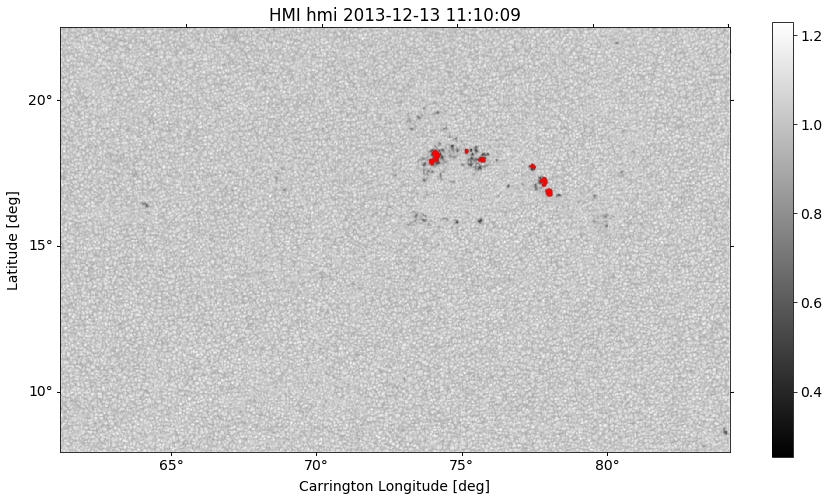

In [37]:
mask = np.argwhere((y.data <= 0.5) & (y.data > 0)) * u.pixel
print(mask.shape)
pixel_wrld = y.pixel_to_world(mask[:, 1], mask[:, 0])
#print(pixel_wrld)
fig = plt.figure()
ax = plt.subplot(projection=y)
y.plot()
ax.plot_coord(pixel_wrld, 'bx', c='red', marker='x', markersize=1)
plt.colorbar()
plt.show()


/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_bitmaps/hmi.sharp_cea_720s.3481.20131213_111200_TAI.bitmap.fits
/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_111200_TAI.enhanced_normalized.fits


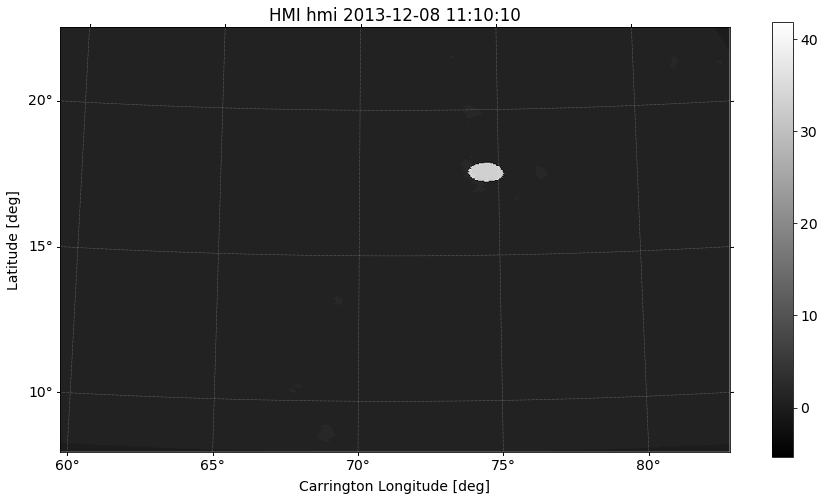

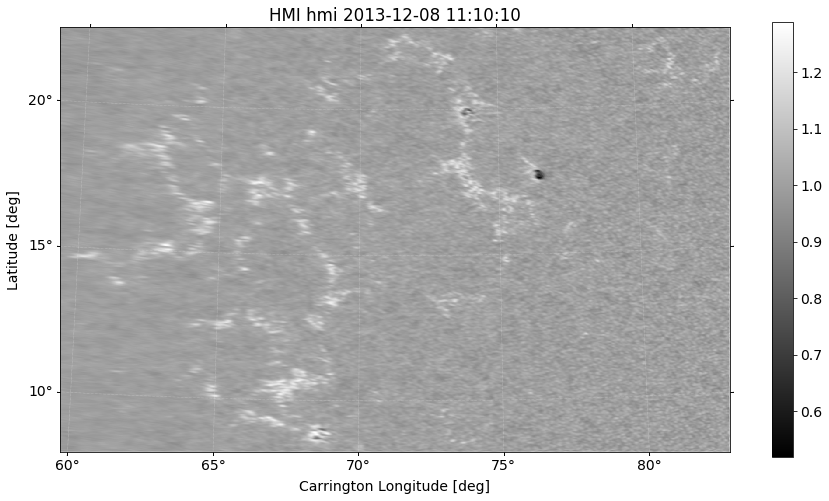

In [43]:
print(bitmaps[600])
print(cont[600])
x1 = sunpy.map.Map(bitmaps[0])
y1 = sunpy.map.Map(cont[0])

new_dimension1 = u.Quantity([x1.meta["naxis1"]*2, x1.meta["naxis2"]*2], u.pixel)
x1.resample(new_dimension1,method='spline').peek()
y1.peek()


<SkyCoord (HeliographicCarrington: obstime=2013-12-13T11:10:09.800): (lon, lat) in deg
    []>


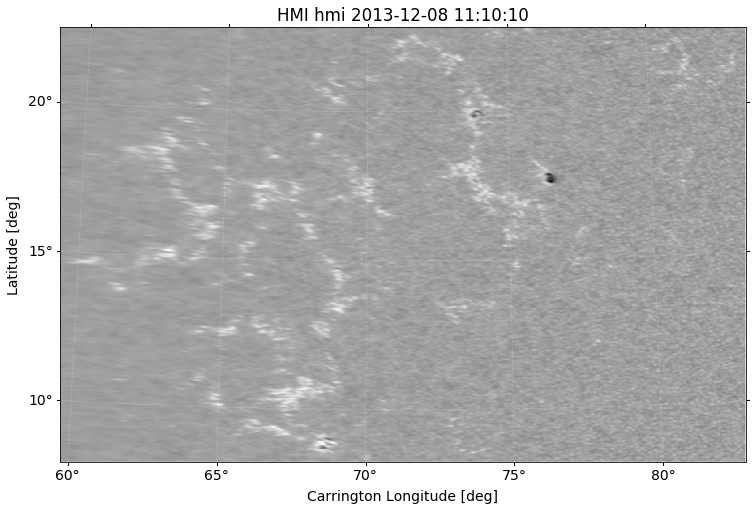

In [46]:
mask1 = np.argwhere((y1.data <= 0.5) & (y1.data > 0)) * u.pixel
mask1.shape
pixel_wrld1 = y.pixel_to_world(mask1[:, 1], mask1[:, 0])
print(pixel_wrld1)
fig = plt.figure()
ax = plt.subplot(projection=y1)
y1.plot()
ax.plot_coord(pixel_wrld1, 'bx', color='red', marker='x', markersize=1)
plt.show()